I computed realizations of multiple HODs for a few statistics in the darksky boxes. This notebook is gonna combine them into a jackknife covmat. It'll also add some estimate of the shape noise contribution. 

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.colors as colors

In [2]:
import numpy as np
from glob import glob
from os import path

In [3]:
#shape_noise_covmat = np.load('/home/users/swmclau2/Git/pearce/bin/covmat/shape_noise_covmat.npy')
shape_noise_covmat = np.load('/home/users/swmclau2/Git/Public-code/Hankel_transform/shape_noise.npy')

In [4]:
np.max(shape_noise_covmat)

102886774.58953618

In [5]:
output_dir = '/home/users/swmclau2/Git/pearce/bin/covmat/ds14_covmat_v2/'

In [6]:
outputs = sorted(glob(path.join(output_dir, 'wp_ds_cic_darksky_obs_???_v2.npy')))
print len(outputs)

512


In [7]:
N = len(outputs) # Should be 512, but a few may not have finished. Should make sure that those get reestarted, but likely not super important
all_outputs = np.zeros((N, 5,  2*18 + 14)) # num bins and num HODs 

In [8]:
2*18+14

50

In [9]:
for i,output_file in enumerate(outputs):
    output = np.load(output_file)

    all_outputs[i] = output#.mean(axis = 0)

In [10]:
all_outputs.shape

(512, 5, 50)

In [11]:
rp_bins = np.logspace(-1.0, 1.6, 19)
cic_bins = np.round(np.r_[np.linspace(1, 9, 8), np.round(np.logspace(1,2, 7))] )

In [12]:
cic_bins

array([  1.,   2.,   3.,   4.,   6.,   7.,   8.,   9.,  10.,  15.,  22.,
        32.,  46.,  68., 100.])

In [13]:
rp_points = (rp_bins[1:]+rp_bins[:-1])/2.0
cic_points = (cic_bins[1:]+cic_bins[:-1])/2.0

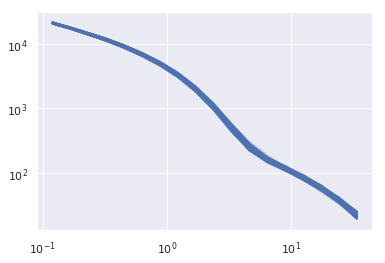

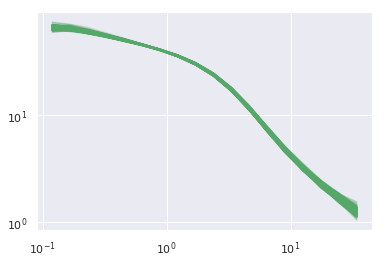

In [14]:
hod_idx = 4
plt.plot(rp_points, (all_outputs[:,hod_idx, :18]).T, alpha = 0.3, color = 'b')
plt.loglog();
plt.show();
plt.plot(rp_points, (all_outputs[:,hod_idx, 18:36]).T, alpha = 0.3, color = 'g')
plt.loglog();
plt.show();
#plt.plot(cic_points, all_outputs[idx, 36:])
#plt.loglog();
#plt.show();

In [15]:
mean = all_outputs.mean(axis = 0)

In [16]:
R =(all_outputs - mean)

cov = np.zeros((R.shape[2], R.shape[2]))
for i in xrange(R.shape[1]):
    cov+= R[:,i].T.dot(R[:,i])/(N-1)
    
cov/=R.shape[1]

In [17]:
cov.shape

(50, 50)

In [18]:
np.min(cov)

-60.129559519423864

In [19]:
def cov_to_corr(cov):
    std = np.sqrt(np.diag(cov))
    
    denom = np.outer(std, std)
    
    return cov/denom

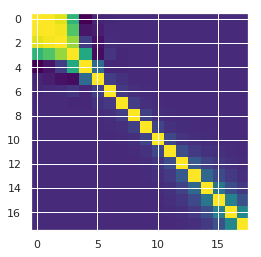

In [20]:
plt.imshow(cov_to_corr(shape_noise_covmat), cmap = 'viridis')

In [21]:
print(cov_to_corr(shape_noise_covmat))[:5, :5]

[[ 1.          0.99288574  0.94697597  0.60688974 -0.13385098]
 [ 0.99288574  1.          0.97837579  0.6921637  -0.06355731]
 [ 0.94697597  0.97837579  1.          0.82218979  0.07869213]
 [ 0.60688974  0.6921637   0.82218979  1.          0.55492032]
 [-0.13385098 -0.06355731  0.07869213  0.55492032  1.        ]]


In [22]:
from copy import deepcopy

In [23]:
full_cov = deepcopy(cov)

full_cov[18:36][:, 18:36] = full_cov[18:36][:, 18:36]+ shape_noise_covmat

In [24]:
corr = cov_to_corr(cov)
full_corr = cov_to_corr(full_cov)

In [25]:
cmap = sns.diverging_palette(240, 10, n=7, as_cmap = True)

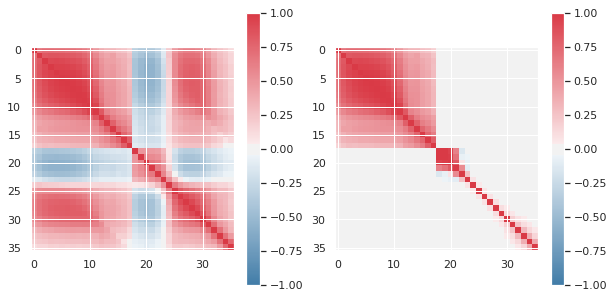

In [26]:
fig = plt.figure(figsize = (10, 5))
plt.subplot(121)
im = plt.imshow(corr[:36][:, :36], cmap = cmap, vmin = -1)
plt.colorbar(im);
plt.subplot(122)
im = plt.imshow(full_corr[:36][:, :36], cmap = cmap, vmin = -1)
plt.colorbar(im);
plt.show()

In [29]:
np.save('/home/users/swmclau2/Git/pearce/bin/covmat/wp_ds_full_covmat.npy', full_cov[:36][:,:36])

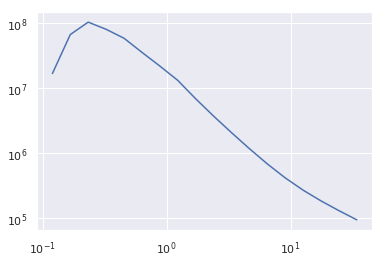

In [86]:
plt.plot(rp_points, np.diag(shape_noise_covmat))
plt.loglog();

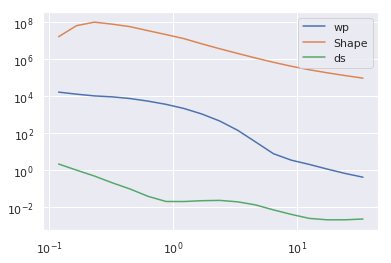

In [85]:
plt.plot(rp_points, np.diag(full_cov[:18, :18]), label = 'wp')
plt.plot(rp_points, np.diag(shape_noise_covmat), label = 'Shape')
plt.plot(rp_points, np.diag(cov[18:36, 18:36]), label = 'ds')
plt.loglog()
plt.legend(loc='best')

In [40]:
im_cov = np.log10(cov)#np.log10(cov - np.min(cov) + 1)

/share/software/user/open/py-scipystack/1.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.colors as colors

In [ ]:
im = plt.imshow(im_cov, vmin = 0)#, norm=colors.LogNorm(vmin=im_cov.min(), vmax=im_cov.max()))
plt.colorbar(im);

In [ ]:
im = plt.imshow(im_cov[:18, :18])
plt.colorbar(im)

In [ ]:
im = plt.imshow(im_cov[18:36, 18:36])
plt.colorbar(im);

In [ ]:
print rp_points[:6], rp_points[6:]

In [ ]:
im = plt.imshow(im_cov[18:36, :18])
plt.colorbar(im);

In [ ]:
im = plt.imshow(im_cov[36:, 36:])
plt.colorbar(im);

In [ ]:
im = plt.imshow(np.log10(cov))#, norm=colors.LogNorm(vmin = min(np.min(cov), 0.0), vmax = np.max(cov)))
plt.colorbar(im);

In [ ]:
r_bins = np.logspace(-1.1, 1.6, 19)
rpoints = (r_bins[1:]+r_bins[:-1])/2.0

In [ ]:
plt.plot(rpoints, all_outputs[0, :18].T, color = 'b')
plt.plot(rpoints, all_outputs[0, 18:].T, color = 'r')

plt.loglog()

In [ ]:
plt.plot(rpoints, all_outputs[0, :18].T/all_outputs[0, 18:].T, color = 'b')
#plt.plot(rpoints, all_outputs[0, 18:].T, color = 'r', alpha = 0.3)

#plt.loglog()
plt.xscale('log')